In [ ]:
!nvidia-smi

# Install detectron2 (official nightly wheel for Colab)
!pip install -q torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121
!pip install -q 'git+https://github.com/facebookresearch/detectron2.git'

!pip install -q pycocotools


Sat Dec  6 11:11:12 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   64C    P8             12W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sithmafernando","key":"cda170567991d4a444b967079572ceaa"}'}

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d ashishpatel26/coco2017
!unzip coco2017.zip -d coco5k



403 Client Error: Forbidden for url: https://www.kaggle.com/api/v1/datasets/metadata/ashishpatel26/coco2017
unzip:  cannot find or open coco2017.zip, coco2017.zip.zip or coco2017.zip.ZIP.


# All start from here

In [ ]:
# Check GPU
!nvidia-smi


Sat Dec  6 04:23:38 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   37C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
# 1) Install PyTorch (you can skip/adjust if Colab already has a recent version)
!pip install --upgrade torch torchvision --index-url https://download.pytorch.org/whl/cu121

# 2) Install Detectron2 (latest from GitHub)
!pip install 'git+https://github.com/facebookresearch/detectron2.git'

# 3) Install FasterViT (official pip package)
!pip install 'fastervit>=0.9.8'


Looking in indexes: https://download.pytorch.org/whl/cu121
  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-7hn2rux2
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-7hn2rux2
  Resolved https://github.com/facebookresearch/detectron2.git to commit fd27788985af0f4ca800bca563acdb700bb890e2
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.9/167.9 kB 7.3 MB/s eta 0:00:00


Download Pascal VOC 2007 + 2012

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving kaggle.json to kaggle.json


In [ ]:
import os, shutil

os.makedirs("/root/.kaggle", exist_ok=True)

# Move uploaded kaggle.json into ~/.kaggle/
shutil.move("kaggle.json", "/root/.kaggle/kaggle.json")

# Fix permissions (required by Kaggle API)
os.chmod("/root/.kaggle/kaggle.json", 0o600)


In [ ]:
!kaggle datasets list -s voc


ref                                                        title                                                size  lastUpdated                 downloadCount  voteCount  usabilityRating  
---------------------------------------------------------  ---------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
zaraks/pascal-voc-2007                                     PASCAL VOC 2007                                1774851628  2018-03-25 07:51:46.260000          15270        139  0.6875           
huanghanchina/pascal-voc-2012                              PASCAL VOC 2012                                3899239928  2018-07-06 07:01:18.563000          19174        203  0.3125           
gopalbhattrai/pascal-voc-2012-dataset                      PASCAL VOC 2012 DATASET                        3781078640  2021-04-14 11:26:42.270000          19554         76  0.5              
a13x10/basic-arabic-vocal-emotions-dataset        

In [ ]:
!rm -rf /content/datasets
!mkdir -p /content/datasets

!kaggle datasets download -d bardiaardakanian/voc0712 -p /content/datasets


Dataset URL: https://www.kaggle.com/datasets/bardiaardakanian/voc0712
License(s): CC0-1.0
100% 4.32G/4.35G [00:58<00:00, 23.7MB/s]
100% 4.35G/4.35G [00:58<00:00, 79.4MB/s]


In [ ]:
%cd /content/datasets
!unzip -q voc0712.zip
!ls


/content/datasets
data_dictionary.md  README.md  voc0712.zip  VOC_dataset


In [ ]:
!ls /content/datasets/VOC_dataset/VOCdevkit


VOC2007  VOC2012


In [ ]:
!mv /content/datasets/VOC_dataset/VOCdevkit/VOC2007 /content/datasets/
!mv /content/datasets/VOC_dataset/VOCdevkit/VOC2012 /content/datasets/


In [ ]:
!ls /content/datasets


data_dictionary.md  README.md  voc0712.zip  VOC2007  VOC2012  VOC_dataset


In [ ]:
!ls /content/datasets/VOC2007/ImageSets/Main


aeroplane_test.txt	cat_test.txt		  person_test.txt
aeroplane_train.txt	cat_train.txt		  person_train.txt
aeroplane_trainval.txt	cat_trainval.txt	  person_trainval.txt
aeroplane_val.txt	cat_val.txt		  person_val.txt
bicycle_test.txt	chair_test.txt		  pottedplant_test.txt
bicycle_train.txt	chair_train.txt		  pottedplant_train.txt
bicycle_trainval.txt	chair_trainval.txt	  pottedplant_trainval.txt
bicycle_val.txt		chair_val.txt		  pottedplant_val.txt
bird_test.txt		cow_test.txt		  sheep_test.txt
bird_train.txt		cow_train.txt		  sheep_train.txt
bird_trainval.txt	cow_trainval.txt	  sheep_trainval.txt
bird_val.txt		cow_val.txt		  sheep_val.txt
boat_test.txt		diningtable_test.txt	  sofa_test.txt
boat_train.txt		diningtable_train.txt	  sofa_train.txt
boat_trainval.txt	diningtable_trainval.txt  sofa_trainval.txt
boat_val.txt		diningtable_val.txt	  sofa_val.txt
bottle_test.txt		dog_test.txt		  test.txt
bottle_train.txt	dog_train.txt		  train_test.txt
bottle_trainval.txt	dog_trainval.txt	  train_t

Tell Detectron2 where the datasets are

In [ ]:
import os
os.environ["DETECTRON2_DATASETS"] = "/content/datasets"



In [ ]:
from detectron2.data import MetadataCatalog

print(MetadataCatalog.get("voc_2007_train").thing_classes)


['aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus', 'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike', 'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tvmonitor']


✅ You are training two separate models for comparison

1️⃣ trains the baseline model:

Faster R-CNN + ResNet-50 C4 backbone
Saved in Drive:

output_voc_resnet_c4/

2️⃣ trains the experimental model:

Faster R-CNN + FasterViT-4 C4 backbone
Saved in:

output_voc_fastervit_c4/

# Baseline Model Training
Baseline: ResNet-50 C4 Faster R-CNN on VOC

What we’re doing:
– Training a standard Detectron2 model first
– Gives you a baseline mAP + FPS to compare against FasterViT.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
from detectron2.config import get_cfg
from detectron2.engine import DefaultTrainer
from detectron2.evaluation import PascalVOCDetectionEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader
from detectron2 import model_zoo
import os
from google.colab import drive

# ---- Mount Drive ----
drive.mount('/content/drive')

# Save outputs inside Google Drive
OUTPUT_BASELINE = "/content/drive/MyDrive/detectron2_voc/output_voc_resnet_c4"

cfg = get_cfg()

# Load Faster R-CNN R50-C4 config from Detectron2's model zoo
cfg.merge_from_file(
    model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_50_C4_1x.yaml")
)

# Use Pascal VOC 2007+2012 instead of COCO
cfg.DATASETS.TRAIN = ("voc_2007_trainval", "voc_2012_trainval")
cfg.DATASETS.TEST  = ("voc_2007_test",)

# Dataloader & solver settings (small values so it runs in Colab)
cfg.DATALOADER.NUM_WORKERS = 2
cfg.SOLVER.IMS_PER_BATCH   = 4
cfg.SOLVER.BASE_LR         = 0.001
cfg.SOLVER.MAX_ITER        = 5000
cfg.SOLVER.STEPS           = []   # no LR schedule for this short run

# Detection head
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 20  # VOC has 20 classes

# ---- Set output dir to Drive ----
cfg.OUTPUT_DIR = OUTPUT_BASELINE
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)

trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=False)
trainer.train()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[12/06 04:34:10 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): ResNet(
    (stem): BasicStem(
      (conv1): Conv2d(
        3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
        (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
      )
    )
    (res2): Sequential(
      (0): BottleneckBlock(
        (shortcut): Conv2d(
          64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False
          (norm): FrozenBatchNorm2d(num_features=256, eps=1e-05)
        )
        (conv1): Conv2d(
          64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
        (conv2): Conv2d(
          64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
        (conv3): Conv2d(
  

R-50.pkl: 102MB [00:00, 199MB/s]                            

[12/06 04:34:15 d2.checkpoint.c2_model_loading]: Renaming Caffe2 weights ......


[12/06 04:34:15 d2.checkpoint.c2_model_loading]: Following weights matched with submodule model - Total num: 54


proposal_generator.rpn_head.anchor_deltas.{bias, weight}
proposal_generator.rpn_head.conv.{bias, weight}
proposal_generator.rpn_head.objectness_logits.{bias, weight}
roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}
  fc1000.{bias, weight}
  stem.conv1.bias


[12/06 04:34:15 d2.engine.train_loop]: Starting training from iteration 0


/usr/local/lib/python3.12/dist-packages/torch/functional.py:505: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /pytorch/aten/src/ATen/native/TensorShape.cpp:4317.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
W1206 04:34:19.008000 395 torch/fx/_symbolic_trace.py:52] is_fx_tracing will return true for both fx.symbolic_trace and torch.export. Please use is_fx_tracing_symbolic_tracing() for specifically fx.symbolic_trace or torch.compiler.is_compiling() for specifically torch.export/compile.


[12/06 04:34:39 d2.utils.events]:  eta: 1:23:09  iter: 19  total_loss: 4.295  loss_cls: 3.041  loss_box_reg: 0.2984  loss_rpn_cls: 0.7191  loss_rpn_loc: 0.2655    time: 0.9993  last_time: 1.0184  data_time: 0.0375  last_data_time: 0.0040   lr: 1.9981e-05  max_mem: 3785M
[12/06 04:35:11 d2.utils.events]:  eta: 1:24:54  iter: 39  total_loss: 3.367  loss_cls: 2.129  loss_box_reg: 0.3725  loss_rpn_cls: 0.7119  loss_rpn_loc: 0.2279    time: 1.0211  last_time: 1.0272  data_time: 0.0313  last_data_time: 0.0433   lr: 3.9961e-05  max_mem: 3820M
[12/06 04:35:32 d2.utils.events]:  eta: 1:24:55  iter: 59  total_loss: 2.062  loss_cls: 0.7169  loss_box_reg: 0.4094  loss_rpn_cls: 0.6943  loss_rpn_loc: 0.2544    time: 1.0303  last_time: 1.0494  data_time: 0.0289  last_data_time: 0.0167   lr: 5.9941e-05  max_mem: 3820M
[12/06 04:35:54 d2.utils.events]:  eta: 1:25:49  iter: 79  total_loss: 2.277  loss_cls: 0.8558  loss_box_reg: 0.5672  loss_rpn_cls: 0.6681  loss_rpn_loc: 0.2047    time: 1.0461  last_tim

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
ls /content/drive/MyDrive/detectron2_voc/output_voc_resnet_c4/


events.out.tfevents.1764995691.9b057b4133ab.395.0  model_0004999.pth
last_checkpoint                                    model_final.pth
metrics.json


Evaluate the trained baseline model on VOC2007 test

In [ ]:
from detectron2.config import get_cfg
from detectron2 import model_zoo
from detectron2.engine import DefaultTrainer
from detectron2.checkpoint import DetectionCheckpointer
from detectron2.evaluation import PascalVOCDetectionEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader

# -------------------------
# 1) LOAD CONFIG + WEIGHTS
# -------------------------
cfg = get_cfg()
cfg.merge_from_file(
    model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_50_C4_1x.yaml")
)

cfg.MODEL.ROI_HEADS.NUM_CLASSES = 20
cfg.MODEL.DEVICE = "cuda"

cfg.MODEL.WEIGHTS = "/content/drive/MyDrive/detectron2_voc/output_voc_resnet_c4/model_final.pth"

# Build model and load weights
model = DefaultTrainer.build_model(cfg)
DetectionCheckpointer(model).load(cfg.MODEL.WEIGHTS)

# -------------------------
# 2) BUILD EVALUATION TOOLS
# -------------------------
evaluator  = PascalVOCDetectionEvaluator("voc_2007_test")
test_loader = build_detection_test_loader(cfg, "voc_2007_test")

# -------------------------
# 3) RUN INFERENCE
# -------------------------
print("Evaluating saved model on VOC 2007 Test Split...")
results = inference_on_dataset(model, test_loader, evaluator)

print("Final results:")
print(results)


[12/06 06:59:25 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): ResNet(
    (stem): BasicStem(
      (conv1): Conv2d(
        3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
        (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
      )
    )
    (res2): Sequential(
      (0): BottleneckBlock(
        (shortcut): Conv2d(
          64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False
          (norm): FrozenBatchNorm2d(num_features=256, eps=1e-05)
        )
        (conv1): Conv2d(
          64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
        (conv2): Conv2d(
          64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
        (conv3): Conv2d(
          64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False
          (norm): FrozenBatchNorm2d(num_features=256, eps=1e-05)
 

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


[12/06 06:59:29 d2.evaluation.evaluator]: Inference done 11/4952. Dataloading: 0.0011 s/iter. Inference: 0.1644 s/iter. Eval: 0.0003 s/iter. Total: 0.1657 s/iter. ETA=0:13:38
[12/06 06:59:34 d2.evaluation.evaluator]: Inference done 42/4952. Dataloading: 0.0016 s/iter. Inference: 0.1665 s/iter. Eval: 0.0003 s/iter. Total: 0.1685 s/iter. ETA=0:13:47
[12/06 06:59:39 d2.evaluation.evaluator]: Inference done 68/4952. Dataloading: 0.0017 s/iter. Inference: 0.1788 s/iter. Eval: 0.0003 s/iter. Total: 0.1809 s/iter. ETA=0:14:43
[12/06 06:59:44 d2.evaluation.evaluator]: Inference done 96/4952. Dataloading: 0.0017 s/iter. Inference: 0.1785 s/iter. Eval: 0.0003 s/iter. Total: 0.1806 s/iter. ETA=0:14:37
[12/06 06:59:49 d2.evaluation.evaluator]: Inference done 121/4952. Dataloading: 0.0017 s/iter. Inference: 0.1830 s/iter. Eval: 0.0003 s/iter. Total: 0.1851 s/iter. ETA=0:14:54
[12/06 06:59:54 d2.evaluation.evaluator]: Inference done 148/4952. Dataloading: 0.0018 s/iter. Inference: 0.1832 s/iter. Eva

Measure throughput (images / second) of the baseline detector

In [ ]:
import torch, time

def measure_throughput(model, input_size=(3, 800, 800), batch_size=4,
                       warmup=10, iters=30):
    model.eval()
    device = next(model.parameters()).device

    # Dummy batch of images
    dummy = torch.randn(batch_size, *input_size, device=device)

    # Warm-up (stabilize GPU)
    with torch.no_grad():
        for _ in range(warmup):
            _ = model([{"image": dummy[i],
                        "height": input_size[1],
                        "width": input_size[2]} for i in range(batch_size)])

    # Timed runs
    start = time.time()
    with torch.no_grad():
        for _ in range(iters):
            _ = model([{"image": dummy[i],
                        "height": input_size[1],
                        "width": input_size[2]} for i in range(batch_size)])
    end = time.time()

    total_images = batch_size * iters
    ips = total_images / (end - start)
    return ips

print("Measuring throughput of baseline ResNet-50 C4 detector...")
baseline_fps = measure_throughput(trainer.model)
print(f"Baseline detector throughput: {baseline_fps:.2f} images/sec")


Measuring throughput of baseline ResNet-50 C4 detector...
Baseline detector throughput: 8.35 images/sec


# evaluation for the model run on CPU

In [ ]:
from detectron2.evaluation import PascalVOCDetectionEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader

# 1) Create evaluator for VOC 2007 test set
evaluator = PascalVOCDetectionEvaluator("voc_2007_test")

# 2) Build test dataloader
val_loader = build_detection_test_loader(cfg, "voc_2007_test")

# 3) Run inference on the test set
print("Evaluating baseline ResNet-50 C4 model on VOC2007 test...")
baseline_results = inference_on_dataset(trainer.model, val_loader, evaluator)
print(baseline_results)


[12/01 16:33:31 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[12/01 16:33:31 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[12/01 16:33:31 d2.data.common]: Serializing 4952 elements to byte tensors and concatenating them all ...
[12/01 16:33:31 d2.data.common]: Serialized dataset takes 2.27 MiB
Evaluating baseline ResNet-50 C4 model on VOC2007 test...
[12/01 16:33:31 d2.evaluation.evaluator]: Start inference on 4952 batches
[12/01 16:33:34 d2.evaluation.evaluator]: Inference done 11/4952. Dataloading: 0.0014 s/iter. Inference: 0.1934 s/iter. Eval: 0.0003 s/iter. Total: 0.1952 s/iter. ETA=0:16:04
[12/01 16:33:39 d2.evaluation.evaluator]: Inference done 37/4952. Dataloading: 0.0018 s/iter. Inference: 0.1965 s/iter. Eval: 0.0003 s/iter. Total: 0.1987 s/iter. ETA=0:16:16
[12/01 16:33:45 d2.evaluation.evaluator]: Infere

Measure throughput (images / second) of the baseline detector

In [ ]:
import torch, time

def measure_throughput(model, input_size=(3, 800, 800), batch_size=4,
                       warmup=10, iters=30):
    model.eval()
    device = next(model.parameters()).device

    # Dummy batch of images
    dummy = torch.randn(batch_size, *input_size, device=device)

    # Warm-up (stabilize GPU)
    with torch.no_grad():
        for _ in range(warmup):
            _ = model([{"image": dummy[i],
                        "height": input_size[1],
                        "width": input_size[2]} for i in range(batch_size)])

    # Timed runs
    start = time.time()
    with torch.no_grad():
        for _ in range(iters):
            _ = model([{"image": dummy[i],
                        "height": input_size[1],
                        "width": input_size[2]} for i in range(batch_size)])
    end = time.time()

    total_images = batch_size * iters
    ips = total_images / (end - start)
    return ips

print("Measuring throughput of baseline ResNet-50 C4 detector...")
baseline_fps = measure_throughput(trainer.model)
print(f"Baseline detector throughput: {baseline_fps:.2f} images/sec")


Measuring throughput of baseline ResNet-50 C4 detector...
Baseline detector throughput: 6.34 images/sec


# next part
Install FasterViT and import helpers

📌 Why: We need the official FasterViT implementation so we can load ImageNet-21K pretrained weights like the paper does and reuse them as a detector backbone.


In [ ]:
!pip install -q "fastervit>=0.9.8"


In [ ]:

import os
import torch.nn as nn

from fastervit import create_model

from detectron2.config import get_cfg, CfgNode as CN
from detectron2 import model_zoo
from detectron2.engine import DefaultTrainer
from detectron2.evaluation import PascalVOCDetectionEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader
from detectron2.modeling import BACKBONE_REGISTRY, Backbone, ShapeSpec
from detectron2.checkpoint import DetectionCheckpointer


/usr/local/lib/python3.12/dist-packages/timm/models/registry.py:4: FutureWarning: Importing from timm.models.registry is deprecated, please import via timm.models
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.models", FutureWarning)
/usr/local/lib/python3.12/dist-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)


In [ ]:
def add_fvit_config(cfg):
    """
    Extend Detectron2 config with FasterViT-specific options.
    You already had:
        cfg.MODEL.FASTERVIT = CN()
        cfg.MODEL.FASTERVIT.WEIGHTS = "/content/FasterViT-4-21K-224_w14.pth.tar"
    """
    cfg.MODEL.FASTERVIT = CN()
    cfg.MODEL.FASTERVIT.WEIGHTS = "/content/FasterViT-4-21K-224_w14.pth.tar"  # adjust path if needed


Step 2 – Wrap FasterViT as a Detectron2 backbone (C4-style)

In [ ]:
import torch.nn as nn
from detectron2.modeling import BACKBONE_REGISTRY, Backbone, ShapeSpec
from fastervit.models import create_model

# Optional: clean old registration to avoid "already registered" error
from detectron2.modeling import BACKBONE_REGISTRY
if "FasterViT_C4Backbone" in BACKBONE_REGISTRY._obj_map:
    del BACKBONE_REGISTRY._obj_map["FasterViT_C4Backbone"]

@BACKBONE_REGISTRY.register()
class FasterViT_C4Backbone(Backbone):
    def __init__(self, cfg, input_shape: ShapeSpec):
        super().__init__()

        # ---- 1) Load FasterViT ----
        cfg.MODEL.FASTERVIT.WEIGHTS = "/content/FasterViT-4-21K-224_w14.pth.tar"
        ckpt = cfg.MODEL.FASTERVIT.WEIGHTS

        # any-res model
        self.net = create_model(
            "faster_vit_4_any_res",
            resolution=[cfg.INPUT.MIN_SIZE_TRAIN[0], cfg.INPUT.MIN_SIZE_TRAIN[0]],
            pretrained=False,
            model_path=ckpt,
        )

        # We will NOT use net.forward_features (it goes through HAT + carrier tokens)
        # We'll manually use: patch_embed -> levels[0] -> levels[1]

        # Infer in_channels from stage 2 output (after levels[1])
        # levels[1].downsample.reduction[0] is Conv2d(in=392, out=784, ...)
        in_channels = self.net.levels[1].downsample.reduction[0].out_channels  # should be 784

        # Project to 1024 channels for Res5/ROI heads compatibility
        self.proj = nn.Conv2d(in_channels, 1024, kernel_size=1)

        # Standard C4-style meta info
        self._out_features = ["res4"]
        self._out_feature_channels = {"res4": 1024}
        # Stride: input -> /4 (patch_embed) -> /8 (level0 downsample) -> /16 (level1 downsample)
        self._out_feature_strides = {"res4": 16}

    def forward(self, x):
        """
        x: (B, 3, H, W)
        returns: {"res4": (B, 1024, H/16, W/16)}
        """

        # ---- 2) Patch embedding ----
        # This replaces the usual stem of a CNN
        x = self.net.patch_embed(x)     # (B, C=196, H/4, W/4)

        # ---- 3) First conv stage (no global tokens) ----
        x = self.net.levels[0](x)       # conv blocks + downsample -> stride /8

        # ---- 4) Second conv stage (no HAT yet) ----
        x = self.net.levels[1](x)       # conv blocks + downsample -> stride /16

        # ---- 5) Project to 1024 channels for Detectron2 head ----
        feat = self.proj(x)

        return {"res4": feat}

    def output_shape(self):
        return {
            name: ShapeSpec(
                channels=self._out_feature_channels[name],
                stride=self._out_feature_strides[name],
            )
            for name in self._out_features
        }


Create a config for “Faster R-CNN + FasterViT-4 C4”

📌 Why: We want same detector, same dataset, same training hyper-params as baseline.
Only change: replace ResNet-50 backbone with FasterViT_C4Backbone.
This makes the comparison fair (backbone is the only difference).

In [ ]:
import os

folder_name = "fvit"
os.makedirs(folder_name, exist_ok=True)

print("Folder created:", folder_name)


Folder created: fvit


In [ ]:
!wget -O /content/fvit_4_21k_224_w14.pth.tar "<https://huggingface.co/ahatamiz/FasterViT/resolve/main/fastervit_4_21k_224_w14.pth.tar>"



<https://huggingface.co/ahatamiz/FasterViT/resolve/main/fastervit_4_21k_224_w14.pth.tar>: Scheme missing.


In [ ]:
!ls -lh /content


total 8.0K
drwxr-xr-x 6 root root 4.0K Dec  6 11:19 datasets
-rw-r--r-- 1 root root    0 Dec  6 11:19 fvit_4_21k_224_w14.pth.tar
drwxr-xr-x 1 root root 4.0K Nov 20 14:30 sample_data


In [ ]:
from detectron2.config import CfgNode as CN

def add_fvit_config(cfg):
    cfg.MODEL.FASTERVIT = CN()
    cfg.MODEL.FASTERVIT.WEIGHTS = "/content/FasterViT-4-21K-224_w14.pth.tar"


In [ ]:
# Folder for FasterViT model outputs (also in Drive)
OUTPUT_FVIT = "/content/drive/MyDrive/detectron2_voc/output_voc_fastervit_c4"

cfg_fvit = get_cfg()
cfg_fvit.merge_from_file(
    model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_50_C4_1x.yaml")
)

# Extend with FasterViT-specific options (adds MODEL.FASTERVIT.WEIGHTS)
add_fvit_config(cfg_fvit)

# Use the same Pascal VOC splits as baseline
cfg_fvit.DATASETS.TRAIN = ("voc_2007_trainval", "voc_2012_trainval")
cfg_fvit.DATASETS.TEST  = ("voc_2007_test",)

# Same training settings as baseline (for fair comparison)
cfg_fvit.DATALOADER.NUM_WORKERS = 2
cfg_fvit.SOLVER.IMS_PER_BATCH   = 4
cfg_fvit.SOLVER.BASE_LR         = 0.001
cfg_fvit.SOLVER.MAX_ITER        = 5000
cfg_fvit.SOLVER.STEPS           = []   # no LR decay in this short run

cfg_fvit.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128
cfg_fvit.MODEL.ROI_HEADS.NUM_CLASSES = 20

# 🔴 Key line: swap backbone to our FasterViT wrapper
cfg_fvit.MODEL.BACKBONE.NAME = "FasterViT_C4Backbone"

cfg_fvit.OUTPUT_DIR = OUTPUT_FVIT
os.makedirs(cfg_fvit.OUTPUT_DIR, exist_ok=True)


Train Faster R-CNN with FasterViT-4 backbone

In [ ]:
trainer_fvit = DefaultTrainer(cfg_fvit)
trainer_fvit.resume_or_load(resume=False)
trainer_fvit.train()


/usr/local/lib/python3.12/dist-packages/torch/functional.py:505: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /pytorch/aten/src/ATen/native/TensorShape.cpp:4317.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


[12/06 11:20:37 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FasterViT_C4Backbone(
    (net): FasterViT(
      (patch_embed): PatchEmbed(
        (proj): Identity()
        (conv_down): Sequential(
          (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
          (1): BatchNorm2d(64, eps=0.0001, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU()
          (3): Conv2d(64, 196, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
          (4): BatchNorm2d(196, eps=0.0001, momentum=0.1, affine=True, track_running_stats=True)
          (5): ReLU()
        )
      )
      (levels): ModuleList(
        (0): FasterViTLayer(
          (blocks): ModuleList(
            (0): ConvBlock(
              (conv1): Conv2d(196, 196, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
              (norm1): BatchNorm2d(196, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
              (act1): GELU(approxim

R-50.pkl: 102MB [00:00, 221MB/s]                            


[12/06 11:20:42 d2.checkpoint.c2_model_loading]: Renaming Caffe2 weights ......
[12/06 11:20:42 d2.checkpoint.c2_model_loading]: Following weights matched with submodule roi_heads.res5 - Total num: 10


backbone.net.head.{bias, weight}
backbone.net.levels.0.blocks.0.conv1.{bias, weight}
backbone.net.levels.0.blocks.0.conv2.{bias, weight}
backbone.net.levels.0.blocks.0.norm1.{bias, running_mean, running_var, weight}
backbone.net.levels.0.blocks.0.norm2.{bias, running_mean, running_var, weight}
backbone.net.levels.0.blocks.1.conv1.{bias, weight}
backbone.net.levels.0.blocks.1.conv2.{bias, weight}
backbone.net.levels.0.blocks.1.norm1.{bias, running_mean, running_var, weight}
backbone.net.levels.0.blocks.1.norm2.{bias, running_mean, running_var, weight}
backbone.net.levels.0.blocks.2.conv1.{bias, weight}
backbone.net.levels.0.blocks.2.conv2.{bias, weight}
backbone.net.levels.0.blocks.2.norm1.{bias, running_mean, running_var, weight}
backbone.net.levels.0.blocks.2.norm2.{bias, running_mean, running_var, weight}
backbone.net.levels.0.downsample.norm.{bias, weight}
backbone.net.levels.0.downsample.reduction.0.weight
backbone.net.levels.1.blocks.0.conv1.{bias, weight}
backbone.net.levels.1.bl

[12/06 11:20:42 d2.engine.train_loop]: Starting training from iteration 0


W1206 11:20:46.179000 210 torch/fx/_symbolic_trace.py:52] is_fx_tracing will return true for both fx.symbolic_trace and torch.export. Please use is_fx_tracing_symbolic_tracing() for specifically fx.symbolic_trace or torch.compiler.is_compiling() for specifically torch.export/compile.


[12/06 11:21:35 d2.utils.events]:  eta: 3:25:11  iter: 19  total_loss: 4.101  loss_cls: 2.999  loss_box_reg: 0.2756  loss_rpn_cls: 0.6994  loss_rpn_loc: 0.2057    time: 2.4678  last_time: 2.3584  data_time: 0.0455  last_data_time: 0.0037   lr: 1.9981e-05  max_mem: 9456M
[12/06 11:22:40 d2.utils.events]:  eta: 3:32:49  iter: 39  total_loss: 2.293  loss_cls: 1.038  loss_box_reg: 0.2671  loss_rpn_cls: 0.6999  loss_rpn_loc: 0.2111    time: 2.5831  last_time: 2.7494  data_time: 0.0354  last_data_time: 0.0131   lr: 3.9961e-05  max_mem: 9576M
[12/06 11:23:35 d2.utils.events]:  eta: 3:39:36  iter: 59  total_loss: 1.672  loss_cls: 0.5075  loss_box_reg: 0.2603  loss_rpn_cls: 0.697  loss_rpn_loc: 0.2276    time: 2.6378  last_time: 2.5865  data_time: 0.0278  last_data_time: 0.0109   lr: 5.9941e-05  max_mem: 9576M
[12/06 11:24:29 d2.utils.events]:  eta: 3:41:11  iter: 79  total_loss: 1.961  loss_cls: 0.6017  loss_box_reg: 0.4132  loss_rpn_cls: 0.6949  loss_rpn_loc: 0.1818    time: 2.6558  last_time

Evaluate FasterViT detector on VOC test

In [ ]:
from detectron2.evaluation import PascalVOCDetectionEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader

# (Optional) set test-time score threshold
cfg_fvit.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5

# Build VOC 2007 test loader using the same cfg_fvit
val_loader_fvit = build_detection_test_loader(cfg_fvit, "voc_2007_test")

# Pascal VOC evaluator
evaluator_fvit = PascalVOCDetectionEvaluator("voc_2007_test")

print("Evaluating FasterViT-C4 model on VOC2007 test...")
fvit_results = inference_on_dataset(trainer_fvit.model, val_loader_fvit, evaluator_fvit)
print(fvit_results)

# mAP @0.5 (VOC-style)
fvit_map = fvit_results.get("mAP", None)
print("FasterViT-C4 mAP@0.5 (VOC):", fvit_map)


[12/06 15:13:51 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[12/06 15:13:51 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[12/06 15:13:51 d2.data.common]: Serializing 4952 elements to byte tensors and concatenating them all ...
[12/06 15:13:51 d2.data.common]: Serialized dataset takes 2.27 MiB
Evaluating FasterViT-C4 model on VOC2007 test...
[12/06 15:13:51 d2.evaluation.evaluator]: Start inference on 4952 batches
[12/06 15:13:54 d2.evaluation.evaluator]: Inference done 11/4952. Dataloading: 0.0021 s/iter. Inference: 0.2242 s/iter. Eval: 0.0006 s/iter. Total: 0.2270 s/iter. ETA=0:18:41
[12/06 15:14:00 d2.evaluation.evaluator]: Inference done 33/4952. Dataloading: 0.0019 s/iter. Inference: 0.2314 s/iter. Eval: 0.0004 s/iter. Total: 0.2339 s/iter. ETA=0:19:10
[12/06 15:14:05 d2.evaluation.evaluator]: Inference done 

Measure throughput (images/sec) for both detectors

In [ ]:
import time
import torch

def measure_throughput(model, input_size=(3, 800, 800),
                       warmup=10, iters=30):
    model.eval()
    device = next(model.parameters()).device

    C, H, W = input_size

    # Build Detectron2-style input: list of dicts
    inputs = [{
        "image": torch.randn(C, H, W, device=device),
        "height": H,
        "width": W
    }]

    # Warm-up
    with torch.no_grad():
        for _ in range(warmup):
            _ = model(inputs)
        if device == "cuda":
            torch.cuda.synchronize()

    # Timed runs
    start = time.time()
    with torch.no_grad():
        for _ in range(iters):
            _ = model(inputs)
        if device == "cuda":
            torch.cuda.synchronize()
    end = time.time()

    throughput = iters / (end - start)  # images per second (batch=1)
    return throughput


In [ ]:


print("Measuring throughput of FasterViT-4 C4 detector...")
fvit_fps = measure_throughput(trainer_fvit.model)
print(f"FasterViT-4 detector throughput: {fvit_fps:.2f} img/s")


Measuring throughput of FasterViT-4 C4 detector...
FasterViT-4 detector throughput: 6.65 img/s


# inference for fastervit backbone

In [ ]:
import cv2
import torch
from detectron2.engine import DefaultPredictor
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog
import matplotlib.pyplot as plt

# Clone config to avoid modifying training config
cfg_vis = cfg_fvit.clone()
cfg_vis.MODEL.WEIGHTS = os.path.join(OUTPUT_FVIT, "model_final.pth")
cfg_vis.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5
cfg_vis.MODEL.DEVICE = "cuda"

predictor = DefaultPredictor(cfg_vis)


[12/06 15:38:38 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from /content/drive/MyDrive/detectron2_voc/output_voc_fastervit_c4/model_final.pth ...


In [ ]:
!wget -O test.jpg https://raw.githubusercontent.com/pjreddie/darknet/master/data/dog.jpg


--2025-12-06 15:39:50--  https://raw.githubusercontent.com/pjreddie/darknet/master/data/dog.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 163759 (160K) [image/jpeg]
Saving to: ‘test.jpg’

test.jpg            100%[===================>] 159.92K  --.-KB/s    in 0.01s   

2025-12-06 15:39:50 (11.4 MB/s) - ‘test.jpg’ saved [163759/163759]



In [ ]:
import cv2, torch
from detectron2.engine import DefaultPredictor
from detectron2.data import MetadataCatalog
from detectron2.utils.visualizer import Visualizer
from google.colab.patches import cv2_imshow

# ---- Clone training config for inference ----
cfg_vis = cfg_fvit.clone()
cfg_vis.MODEL.WEIGHTS = "/content/drive/MyDrive/detectron2_voc/output_voc_fastervit_c4/model_final.pth"
cfg_vis.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.221   # low threshold so we see boxes
cfg_vis.MODEL.DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

print("Using device:", cfg_vis.MODEL.DEVICE)
print("Using weights:", cfg_vis.MODEL.WEIGHTS)

# Build predictor (this builds the full Faster R-CNN + FasterViT model)
predictor_fvit = DefaultPredictor(cfg_vis)

# Quick sanity check: confirm backbone type
print("Backbone class:", predictor_fvit.model.backbone.__class__)


Using device: cuda
Using weights: /content/drive/MyDrive/detectron2_voc/output_voc_fastervit_c4/model_final.pth
[12/06 15:54:54 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from /content/drive/MyDrive/detectron2_voc/output_voc_fastervit_c4/model_final.pth ...
Backbone class: <class '__main__.FasterViT_C4Backbone'>


Number of detections: 2
Scores: [0.23477854 0.23084867]
Predicted classes: [ 1 11]


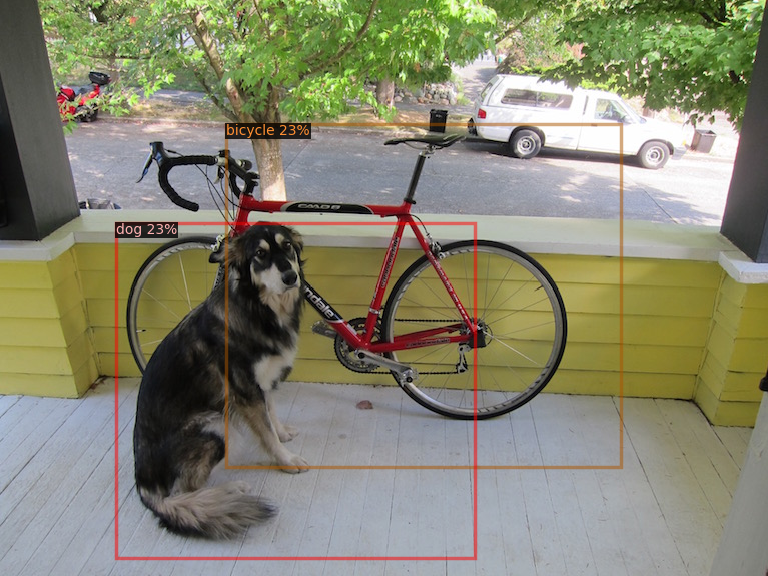

In [ ]:
# Load image (BGR)
img = cv2.imread("test.jpg")

# Run inference
outputs = predictor_fvit(img)
instances = outputs["instances"].to("cpu")

print("Number of detections:", len(instances))
if len(instances) > 0:
    print("Scores:", instances.scores.numpy())
    print("Predicted classes:", instances.pred_classes.numpy())

# Visualize
meta = MetadataCatalog.get("voc_2007_trainval")
v = Visualizer(img[:, :, ::-1], metadata=meta, scale=1.0)
out = v.draw_instance_predictions(instances)

cv2_imshow(out.get_image()[:, :, ::-1])


In [ ]:
!ls -lh /content/drive/MyDrive/detectron2_voc/output_voc_fastervit_c4/


total 3.3G
-rw-r--r-- 1 root root 223K Dec  6 15:09 events.out.tfevents.1765020106.9a4e8dfa39cf.210.0
-rw-r--r-- 1 root root   15 Dec  6 15:09 last_checkpoint
-rw-r--r-- 1 root root 147K Dec  6 15:09 metrics.json
-rw-r--r-- 1 root root 1.7G Dec  6 15:09 model_0004999.pth
-rw-r--r-- 1 root root 1.7G Dec  6 15:09 model_final.pth


In [ ]:
# Check what backbone is in the saved model
print("Backbone used:", trainer_fvit.model.backbone)


Backbone used: FasterViT_C4Backbone(
  (net): FasterViT(
    (patch_embed): PatchEmbed(
      (proj): Identity()
      (conv_down): Sequential(
        (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (1): BatchNorm2d(64, eps=0.0001, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU()
        (3): Conv2d(64, 196, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (4): BatchNorm2d(196, eps=0.0001, momentum=0.1, affine=True, track_running_stats=True)
        (5): ReLU()
      )
    )
    (levels): ModuleList(
      (0): FasterViTLayer(
        (blocks): ModuleList(
          (0): ConvBlock(
            (conv1): Conv2d(196, 196, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
            (norm1): BatchNorm2d(196, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (act1): GELU(approximate='none')
            (conv2): Conv2d(196, 196, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1